In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df= pd.read_csv('mat.9.csv', encoding='utf-8', delimiter = ';')

In [5]:
display(df)

,CIDADE,INEP,NOME DA ESCOLA,EDICAO,CLASSIFICACAO,INICIAL,INTERMEDIARIO,FINAL,PROFICIENCIA
0,FORTALEZA,23080124,DURVAL AIRES JORNALISTA EMEF,2019,Critico,31,38,64,243
1,FORTALEZA,23259418,ESCOLA MUNICIPAL 11 DE AGOSTO,2018,Critico,35,37,46,248
2,FORTALEZA,23259418,ESCOLA MUNICIPAL 11 DE AGOSTO,2019,Critico,34,46,44,248
3,FORTALEZA,23259418,ESCOLA MUNICIPAL 11 DE AGOSTO,2022,Critico,44,37,39,240
4,FORTALEZA,23065192,ESCOLA MUNICIPAL ANGELICA GURGEL,2018,Critico,36,35,41,255
...,...,...,...,...,...,...,...,...,...
367,FORTALEZA,23078600,ESCOLA MUNICIPAL YOLANDA QUEIROZ,2022,Critico,38,42,43,234
368,FORTALEZA,23078626,ESCOLA MUNICIPAL ZAIRA MONTEIRO GONDIM,2018,Critico,41,46,47,257
369,FORTALEZA,23078626,ESCOLA MUNICIPAL ZAIRA MONTEIRO GONDIM,2019,Critico,41,46,47,255
370,FORTALEZA,23078626,ESCOLA MUNICIPAL ZAIRA MONTEIRO GONDIM,2022,Critico,39,43,44,241


In [6]:
df.drop('CIDADE',axis=1,inplace=True)
df.drop('INEP',axis=1,inplace=True)
df.drop('NOME DA ESCOLA',axis=1, inplace=True)
df.drop('EDICAO',axis=1,inplace=True)
df.drop('CLASSIFICACAO',axis=1,inplace=True)

In [7]:
display(df)

,INICIAL,INTERMEDIARIO,FINAL,PROFICIENCIA
0,31,38,64,243
1,35,37,46,248
2,34,46,44,248
3,44,37,39,240
4,36,35,41,255
...,...,...,...,...
367,38,42,43,234
368,41,46,47,257
369,41,46,47,255
370,39,43,44,241


In [8]:
x = df[ df.columns[: -1] ]

In [9]:
display(x)

,INICIAL,INTERMEDIARIO,FINAL
0,31,38,64
1,35,37,46
2,34,46,44
3,44,37,39
4,36,35,41
...,...,...,...
367,38,42,43
368,41,46,47
369,41,46,47
370,39,43,44


In [10]:
y = df[ df.columns[-1: ] ]

In [11]:
y

,PROFICIENCIA
0,243
1,248
2,248
3,240
4,255
...,...
367,234
368,257
369,255
370,241


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
display(x_train.head())
display(y_train.head())

,INICIAL,INTERMEDIARIO,FINAL
55,37,48,52
118,37,41,42
349,40,44,45
107,29,35,37
185,39,43,44


,PROFICIENCIA
55,265
118,231
349,246
107,244
185,240


In [34]:
funcao_regressao = LinearRegression()
funcao_regressao.fit(x_train, y_train)

LinearRegression()

In [35]:
funcao_regressao.score(x_train, y_train)

0.49516785586291046

In [36]:

coef_a = funcao_regressao.coef_
coef_l = funcao_regressao.intercept_

In [37]:
y_pred = funcao_regressao.predict(x_test)

In [38]:
print(y_pred.shape)
print(y_test.shape)

(112, 1)
(112, 1)


In [39]:
coef_a


array([[1.26865325, 0.32835351, 1.00102822]])

In [40]:
coef_l

array([137.93226367])

formula: y = 1,26865*A + 0,32835*B + 1,00102*C + 137,93226

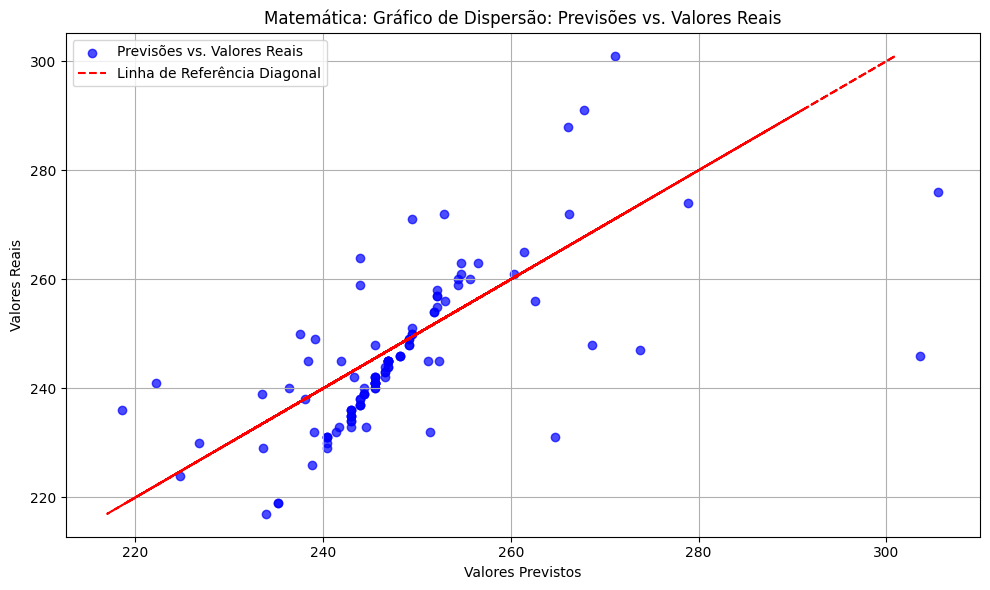

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.7, label='Previsões vs. Valores Reais')
plt.plot(y_test, y_test, linestyle='--', color='red', label='Linha de Referência Diagonal')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matemática: Gráfico de Dispersão: Previsões vs. Valores Reais')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE:", rmse)


RMSE: PROFICIENCIA    11.528158
dtype: float64


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

MAE: 7.98


In [26]:
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.abs((y_true - y_pred) / y_true)).mean() * 100
y_true = y_test.values
y_pred = y_pred
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE: {mape:.2f}%')

MAPE: 3.24%


In [112]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
model.fit(x_train, y_train)
previsoes=model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, previsoes))
print("RMSE:", rmse)

RMSE: 23.202210546015348


In [114]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, previsoes)
print(f'MAE: {mae:.2f}')

MAE: 12.08


In [115]:
def mean_absolute_percentage_error(y_true, previsoes):
    return (np.abs((y_true - previsoes) / y_true)).mean() * 100
y_true = y_test.values  
previsoes = previsoes
mape = mean_absolute_percentage_error(y_true, previsoes)
print(f'MAPE: {mape:.2f}%')

MAPE: 8.68%
